### LIBRARIES USED

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from matplotlib import colors
from IPython import display
import time
from scipy.signal import convolve2d
import os

import glob
from PIL import Image

import functionsAndClasses as fc

### City Model

The city is represented as a L x L grid, in which there is two kinds of agents, residents and merchants. The residents wants to be in a no so dense region of the city and the merchants want to be in a high density region.

### Cluser analysis

EXISTS AT LEAST ONE DISSATISFIED AGENT


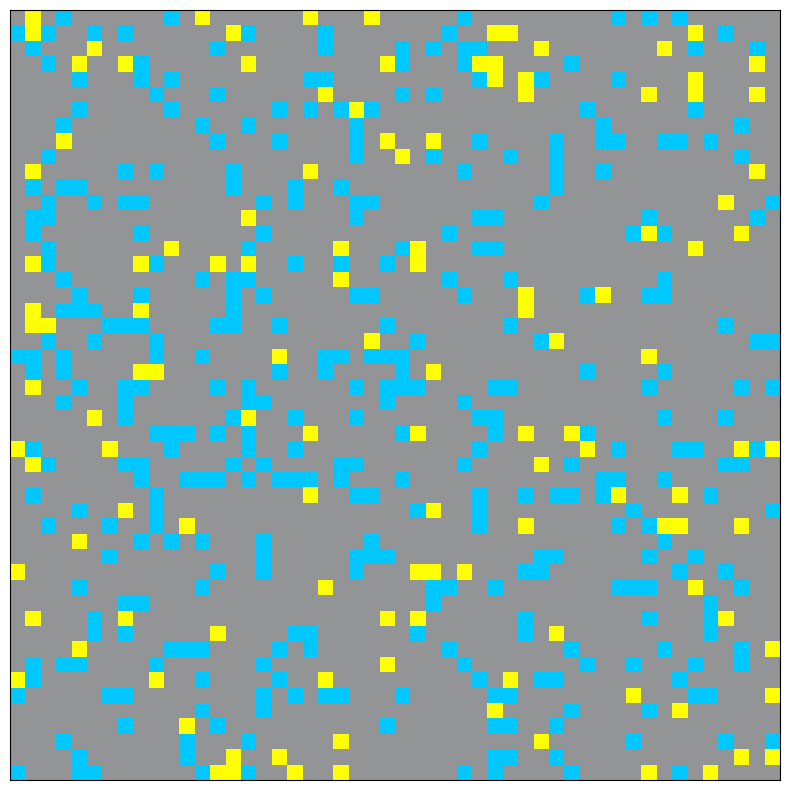

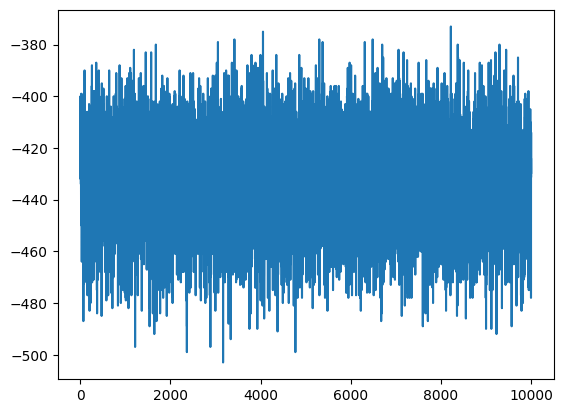

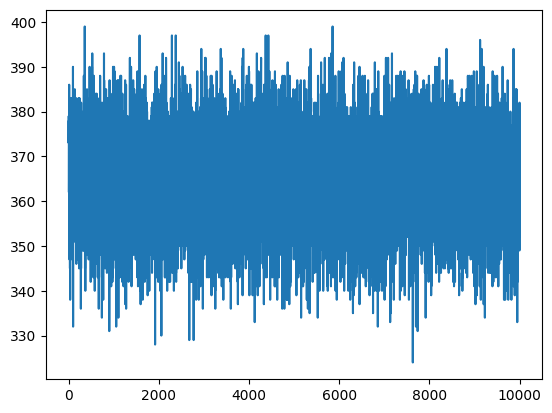

In [24]:
# city properties
L = 50
agentDensity = 0.2
residentRelativeDensity = 0.25
periodicBoundaries = True

# neighborhood size
neighborhood = 1
kernel_side = (2*neighborhood+1)
max_neighbors = kernel_side**2 - 1

# simulation properties
timeSteps = 10000
unitaryEvolution = False
plot = False
plotInterval = 1000
plotEnd = True
calculateEnergy = True
calculateDissatisfied = True

args = [('neighborhood', neighborhood),
        ('periodicBoundaries', periodicBoundaries)]

# simulation
city = fc.City_Continuous(L, agentDensity, residentRelativeDensity)
city.change_properties(args)

if calculateEnergy and calculateDissatisfied:
    energies, dissatisfied = city.simulate(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd, calculateEnergy, calculateDissatisfied)

elif calculateEnergy:
    energies = city.simulate(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd, calculateEnergy, calculateDissatisfied)

elif calculateDissatisfied:
    dissatisfied = city.simulate(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd, calculateEnergy, calculateDissatisfied)

if calculateEnergy:
    plt.figure()
    plt.plot(energies)
    plt.show()

if calculateDissatisfied:
    plt.figure()
    plt.plot(dissatisfied)
    plt.show()

### Create a GIF

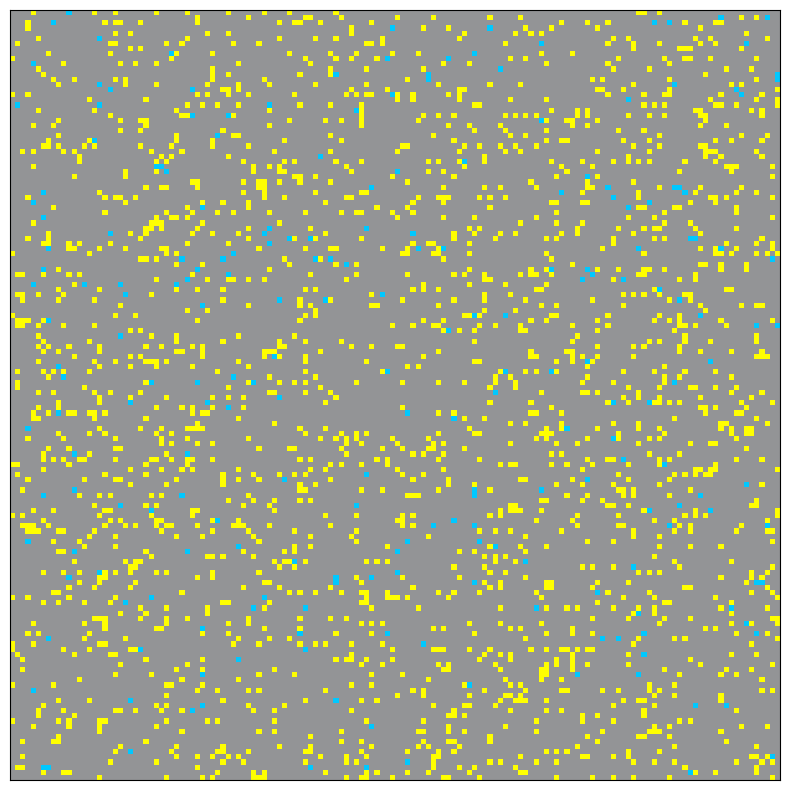

In [5]:
# city properties
L = 150
agentDensity = 0.1
residentRelativeDensity = 0.9
periodicBoundaries = True

# neighborhood size
neighborhood = 1
kernel_side = (2*neighborhood+1)
max_neighbors = kernel_side**2 - 1

# simulation properties
timeSteps = 5000
unitaryEvolution = False
plot = False
plotInterval = 10
plotEnd = True
imagesInGif = 30
animationName = 'animation_(' + str(agentDensity) + ', ' + str(residentRelativeDensity) + ') CONTINUOUS'
args = [('neighborhood', neighborhood),
        ('periodicBoundaries', periodicBoundaries)]

# simulation
city = fc.City_Continuous(L, agentDensity, residentRelativeDensity)
city.change_properties(args)
city.simulate_and_create_gif(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd, imagesInGif)

#read all the .png files in directory called `steps`

image_array = []

for i in range(imagesInGif - 1):
    image = Image.open('steps/C_image_' + str(i) + '.png')
    image_array.append(image)

frame_one = image_array[0]
frame_one.save('steps/' + animationName + '.gif', format="GIF", append_images=image_array,
               save_all=True, duration=200, loop=0)

### Create GIFs for multiple cases

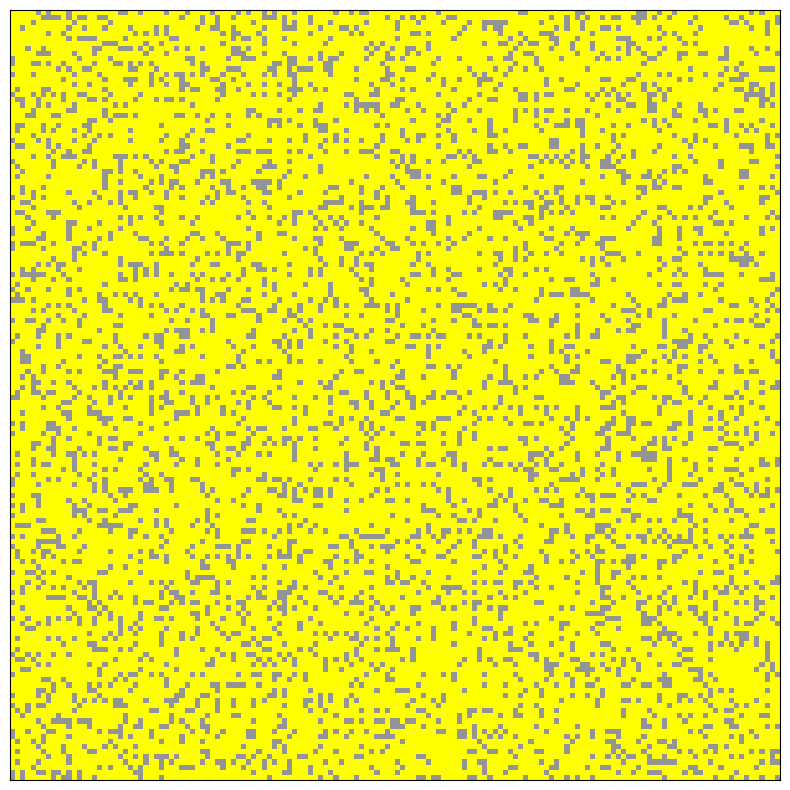

In [2]:
# city properties
L = 150
agentDensityArray = [0.2, 0.35, 0.5, 0.65, 0.8]
residentRelativeDensityArray = [0, 0.25, 0.5, 0.75, 0.95, 1]
periodicBoundaries = True

# neighborhood size
neighborhood = 2
kernel_side = (2*neighborhood+1)
max_neighbors = kernel_side**2 - 1


# simulation properties
timeSteps = 10000
unitaryEvolution = False
plot = False
plotInterval = 10
plotEnd = True
imagesInGif = 30


for agentDensity in agentDensityArray:
    for residentRelativeDensity in residentRelativeDensityArray:
        animationName = 'animation_(' + str(agentDensity) + ', ' + str(residentRelativeDensity) + ', neighborhood = ' + str(neighborhood) + ') CONTINUOUS'
        args = [('neighborhood', neighborhood),
                ('periodicBoundaries', periodicBoundaries)]
        
        # simulation
        city = fc.City_Continuous(L, agentDensity, residentRelativeDensity)
        city.change_properties(args)
        city.simulate_and_create_gif(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd, imagesInGif)
        
        #read all the .png files in directory called `steps`
        image_array = []
        
        for i in range(imagesInGif - 1):
            image = Image.open('steps/C_image_' + str(i) + '.png')
            image_array.append(image)
        
        frame_one = image_array[0]
        frame_one.save('steps/' + animationName + '.gif', format="GIF", append_images=image_array,
                       save_all=True, duration=200, loop=0)

### Clustering analysis for multiple cases

In [4]:
# city properties
L = 50
agentDensityArray = [0.2, 0.35, 0.5, 0.65, 0.8]
residentRelativeDensityArray = [0, 0.25, 0.5, 0.75, 0.95, 1]
periodicBoundaries = True

# neighborhood size
neighborhood = 1
kernel_side = (2*neighborhood+1)
max_neighbors = kernel_side**2 - 1

# simulation properties
timeSteps = 10000
unitaryEvolution = False
simulations = 10
plot = False
plotInterval = 10
plotEnd = False
calculateDissatisfied = True


for agentDensity in agentDensityArray:
    for residentRelativeDensity in residentRelativeDensityArray:
        plotName = 'Ratio of dissatisfied agents over time (' + str(agentDensity) + ', ' + str(residentRelativeDensity) + ') CONTINUOUS'
        args = [('neighborhood', neighborhood),
                ('periodicBoundaries', periodicBoundaries)]
        
        plt.title(plotName)
        plt.xlabel('Time steps')
        plt.ylabel('Ratio of dissatisfied agents')
        plt.ylim(-0.02,1.02)
        for i in range(simulations):
            # simulation
            city = fc.City_Continuous(L, agentDensity, residentRelativeDensity)
            city.change_properties(args)
    
            if calculateDissatisfied:
                dissatisfied = city.simulate(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd, calculateDissatisfied = calculateDissatisfied)
                dissatisfied = dissatisfied/(L*L*agentDensity)
            else:
                city.simulate(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd)
        
            plt.plot(dissatisfied)
            #plt.legend()
        plt.savefig('steps/' + plotName + '.png')
        plt.close()

### Clustering analysis for multiple cases with multiple simulations

In [8]:
# city properties
L = 100
agentDensityArray = [0.2, 0.35, 0.5, 0.65, 0.8]
residentRelativeDensity = 0.9
periodicBoundaries = True

# neighborhood size
neighborhood = 1
kernel_side = (2*neighborhood+1)
max_neighbors = kernel_side**2 - 1


# simulation properties
timeSteps = 10000
simulations = 100

unitaryEvolution = False
plot = False
args = [('neighborhood', neighborhood),
        ('periodicBoundaries', periodicBoundaries)]
numbers = np.arange(0,9)

numClustersAverageDict = dict()
maxClusterSizeAverageDict = dict()

for agentDensity in agentDensityArray:
    numClustersArray = np.zeros(simulations)
    maxClusterSizeAverageArray = np.zeros(simulations)

    args = [('neighborhood', neighborhood),
            ('periodicBoundaries', periodicBoundaries)]
    
    for i in range(simulations):
        city = fc.City(L, agentDensity, residentRelativeDensity)
        city.change_properties(args)
        city.simulate(timeSteps, unitaryEvolution, plot)
    
        HK_class = fc.HoshenKopelman(city.city)
        labels = HK_class.hk(city.merchant_value, periodicBoundaries)
        numClusters, clustersSizes, clustersSizesAverageAcquired = HK_class.cluster_data()
        numClustersArray[i] = numClusters    
        maxClusterSizeAverageArray[i] = max(list(clustersSizes.values()))/(L*L*agentDensity*(1-residentRelativeDensity))

    numClustersAverage = float(numClustersArray.sum())/simulations
    maxClusterSizeAverage = float(maxClusterSizeAverageArray.sum())/simulations
    
    numClustersAverageDict[np.round(agentDensity,3)] = np.round(numClustersAverage,1)
    maxClusterSizeAverageDict[np.round(agentDensity,3)] = np.round(maxClusterSizeAverage,3)

In [9]:
#print(numClustersAverageDict)
#print()
#print(maxClusterSizeAverageDict)

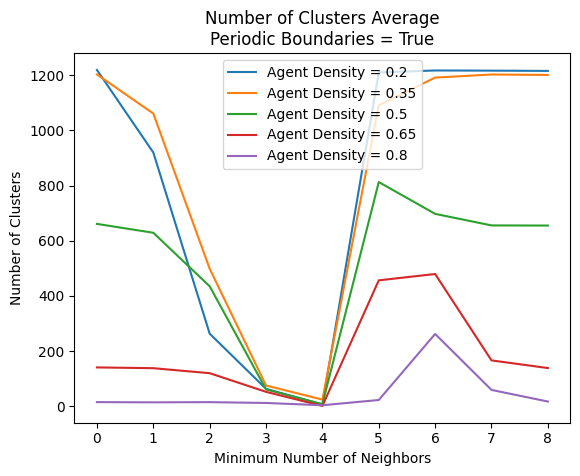

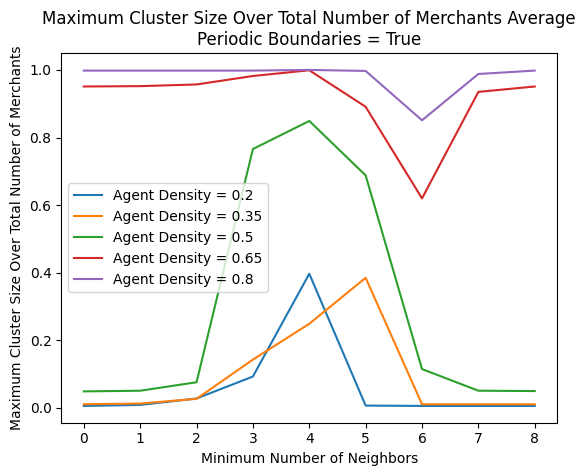

In [10]:
datas = [numClustersAverageDict, maxClusterSizeAverageDict]
numbers = np.arange(0,9)

for i in range(len(datas)):
    data = datas[i]
    values = list(data.values())

    plt.figure()
    aux = 0
    for j in range(len(agentDensityArray)):
        ys = values[aux:aux+len(numbers)]
        aux += len(numbers)

        if i == 0:
            plt.title('Number of Clusters Average' + '\nPeriodic Boundaries = ' + str(periodicBoundaries))
            plt.ylabel('Number of Clusters')
        elif i == 1:
            plt.title('Maximum Cluster Size Over Total Number of Merchants Average' + '\nPeriodic Boundaries = ' + str(periodicBoundaries))
            plt.ylabel('Maximum Cluster Size Over Total Number of Merchants')
    
        plt.xlabel('Minimum Number of Neighbors')
        plt.plot(numbers, ys, label = 'Agent Density = ' + str(agentDensityArray[j]))
        plt.legend()
    plt.show()

### Heatmaps

In [23]:
def generate_heatmap(data,title):
    # Extrair chaves e valores do dicionário
    keys = list(data.keys())
    values = list(data.values())

    # Obter valores únicos de agentDensity e residentRelativeDensity
    agent_density_values = np.unique([key[0] for key in keys])
    relative_density_values = np.unique([key[1] for key in keys])

    # Criar matriz de zeros para armazenar os valores do heatmap
    heatmap_data = np.zeros((len(relative_density_values), len(agent_density_values)))

    # Preencher a matriz com os valores do dicionário
    for i, agent_density in enumerate(agent_density_values):
        for j, relative_density in enumerate(relative_density_values):
            key = (agent_density, relative_density)
            if key in data:
                heatmap_data[j, i] = data[key]

    # Criar o heatmap
    plt.imshow(heatmap_data, cmap='viridis', extent=[0, 1,
                                                    0, 9], aspect = 'auto',
               origin='lower', vmin=min(values), vmax=max(values))
    plt.colorbar(label=title)
    plt.xlabel('Agent Density')
    plt.ylabel('Minimal neighbors merchant density')
    plt.title(title + ' Heatmap')
    plt.show()

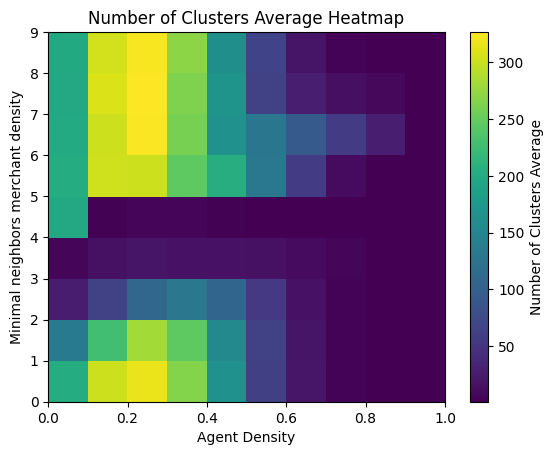

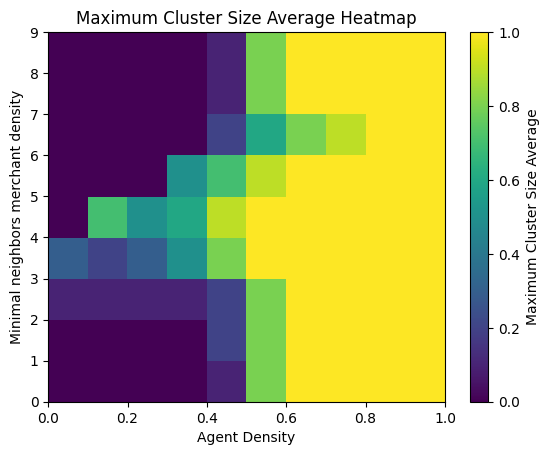

In [24]:
#print(numClustersAverageDict)
generate_heatmap(numClustersAverageDict, 'Number of Clusters Average')

generate_heatmap(maxClusterSizeAverageDict, 'Maximum Cluster Size Average')

### Clustering stability for a pre-existing cluster

EXISTS AT LEAST ONE DISSATISFIED AGENT


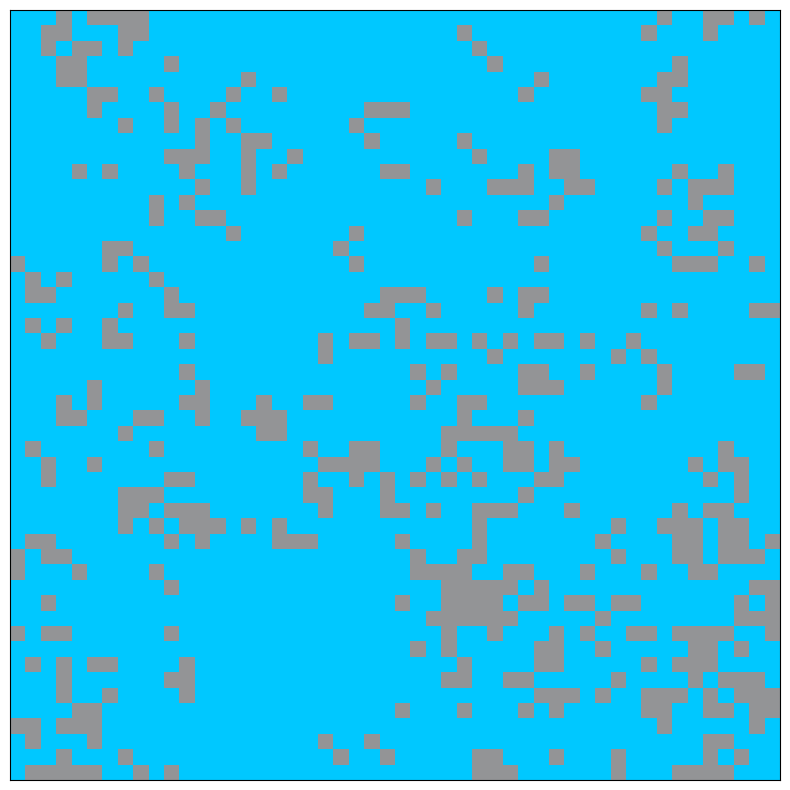

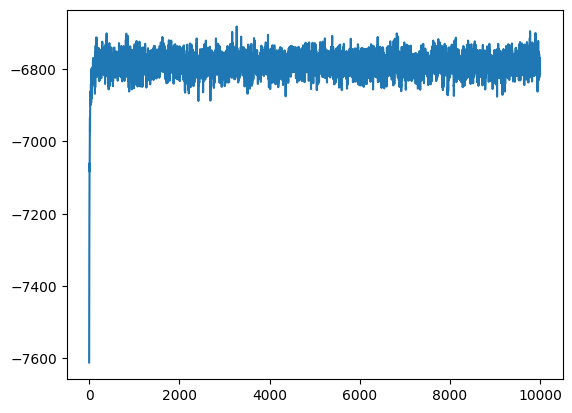

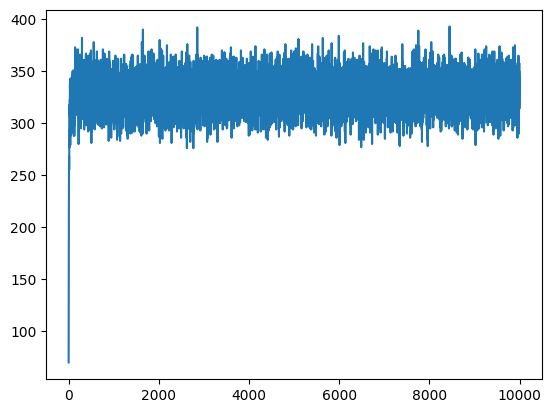

TypeError: City.evolve() takes 2 positional arguments but 3 were given

In [14]:
L = 50
matrix = np.zeros((L,L), dtype = np.int8)
core_shape = 'square'
core_side = 45

initialSize = 0
if core_shape == 'circle':
    a = (L - core_side)//2
    for i in range(a, a+core_side):
        for j in range(a, a+core_side):
            if (i - (a+core_side/2))**2 + (j - (a+core_side/2))**2 <= (core_side/2)**2:
                matrix[i][j] = fc.City.merchant_value
                initialSize += 1

    
if core_shape == 'square':
    a = (L - core_side)//2
    for i in range(a, a+core_side):
        for j in range(a, a+core_side):
            matrix[i][j] = fc.City.merchant_value
            initialSize += 1

# city properties
periodicBoundaries = True

# neighborhood size
neighborhood = 1
kernel_side = (2*neighborhood+1)
max_neighbors = kernel_side**2 - 1

# simulation properties
timeSteps = 10000
unitaryEvolution = False
plot = True
plotInterval = 1000
plotEnd = True
calculateEnergy = True
calculateDissatisfied = True

args = [('neighborhood', neighborhood),
        ('periodicBoundaries', periodicBoundaries)]

# simulation
city = fc.City_Continuous(matrix)
city.change_properties(args)

if calculateEnergy and calculateDissatisfied:
    energies, dissatisfied = city.simulate(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd, calculateEnergy, calculateDissatisfied)

elif calculateEnergy:
    energies = city.simulate(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd, calculateEnergy, calculateDissatisfied)

elif calculateDissatisfied:
    dissatisfied = city.simulate(timeSteps, unitaryEvolution, plot, plotInterval, plotEnd, calculateEnergy, calculateDissatisfied)

if calculateEnergy:
    plt.figure()
    plt.plot(energies)
    plt.show()

if calculateDissatisfied:
    plt.figure()
    plt.plot(dissatisfied)
    plt.show()    
city = fc.City(matrix)

if unitaryEvolution:
    for i in range(timeSteps):
        city.evolve_unitary(periodicBoundaries, 1)
    
        if i%500 == 0 and plot:
            city.print_city()
            display.clear_output(wait=True)

else:
    for i in range(timeSteps):
        city.evolve(periodicBoundaries, 1)

        if i%1 == 0 and plot:
            city.print_city()
            display.clear_output(wait=True)

HK_class = fc.HoshenKopelman(city.city)
labels = HK_class.hk(city.merchant_value, periodicBoundaries)
numClusters, clustersSizes, clustersSizesAverage = HK_class.cluster_data()

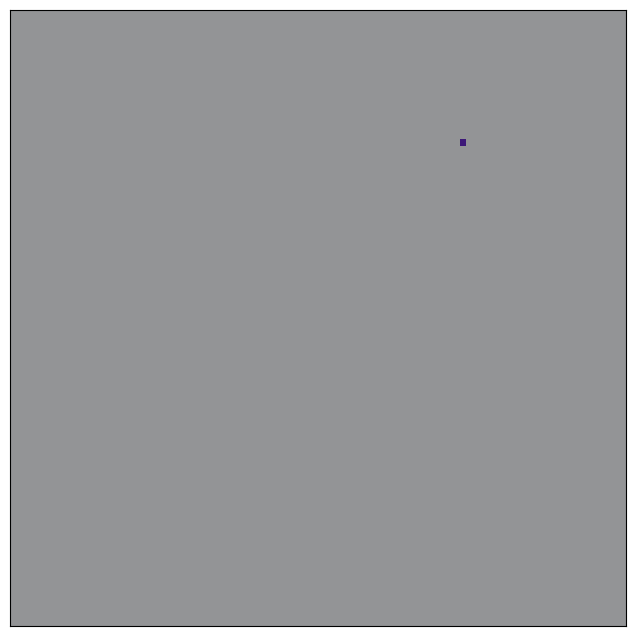

0.01 0.0 1


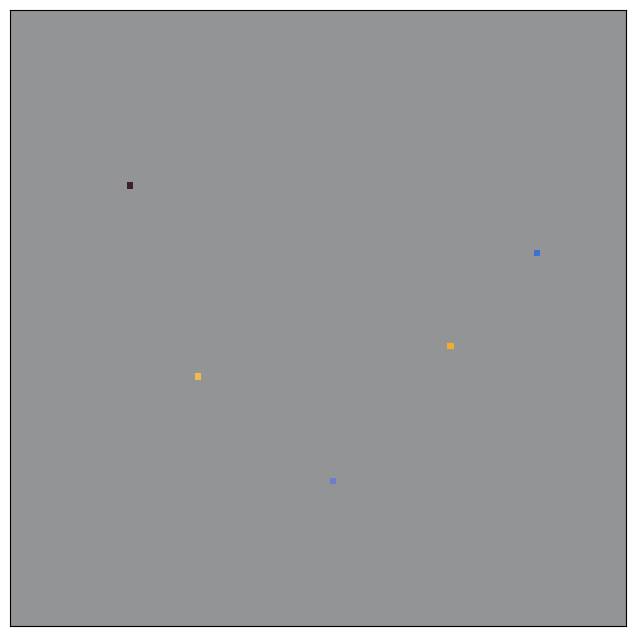

0.02 0.0 1


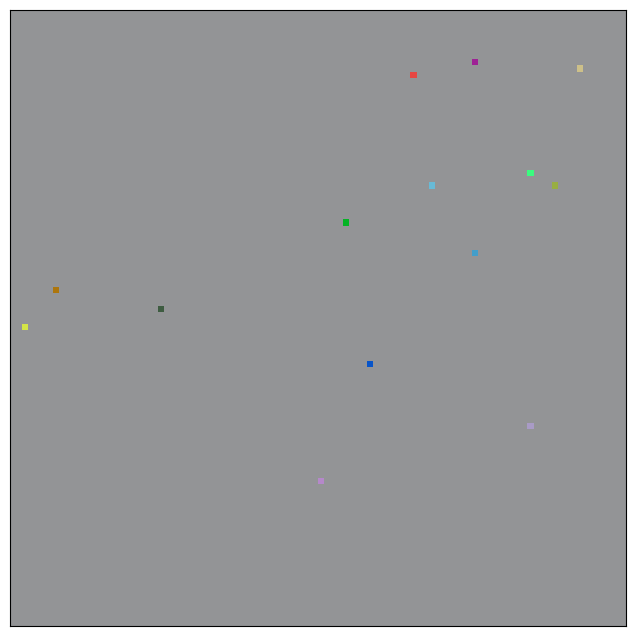

0.03 0.1 1


KeyboardInterrupt: 

In [6]:
L = 100
matrix = np.zeros((L,L), dtype = np.int8)
core_shape = 'square'
core_sideArray = np.arange(1, 50)
periodicBoundaries = True
timeSteps = 10000

for core_side in core_sideArray:
    # creates merchant core
    if core_shape == 'circle':
        a = (L - core_side)//2
        for i in range(a, a+side):
            for j in range(a, a+side):
                if (i - (a+side/2))**2 + (j - (a+side/2))**2 <= (core_side/2)**2:
                    matrix[i][j] = fc.City.merchant_value
    
        
    if core_shape == 'square':
        a = (L - core_side)//2
        for i in range(a, a+core_side):
            for j in range(a, a+core_side):
                matrix[i][j] = fc.City.merchant_value
    
    city = fc.City(matrix)
    city.evolve(periodicBoundaries, timeSteps)
    
    HK_class = fc.HoshenKopelman(city.city)
    labels = HK_class.hk(city.merchant_value, periodicBoundaries)
    numClusters, clustersSizes, clustersSizesAverage = HK_class.cluster_data()
    fc.plot_generic_grid(labels)
    print(float(core_side)/L, np.round(100*(1 - float(len(city.vacantArray))/(L*L)),1), np.max(list(clustersSizes.values())))